In [67]:
import pandas as pd
from astropy import io,table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt

In [69]:
plt.style.use(["default"])
plt.rcParams['figure.figsize'] = 8.0,8.0
font = {"size"   :18}
plt.rc("font",**font)

In [3]:
allstar = table.Table(io.fits.open('GALAH_DR3_main_allstar_v2.fits', mode='update')[1].data)
alls = allstar.to_pandas()

In [4]:
vac_gaia = table.Table(io.fits.open("GALAH_DR3_VAC_GaiaEDR3_v2.fits",mode="update")[1].data)
gaia = vac_gaia.to_pandas()

In [57]:
fits_din = table.Table(io.fits.open("GALAH_DR3_VAC_dynamics_v2.fits",mode="update")[1].data)
var_din = fits_din.to_pandas()

In [47]:
#Subset for only columns needed for Hertzsprung-Russell diagram
hr = alls[["sobject_id","teff","e_teff","logg","e_logg"]]

In [50]:
#Subset for only Coordinates and colors properties in Gaia
dyn1 = gaia[["sobject_id","ra","ra_error","dec","dec_error","parallax",
            "parallax_error","pmra","pmra_error","pmdec","pmdec_error","bp_rp","bp_g",
           "g_rp","dr2_radial_velocity","dr2_radial_velocity_error","phot_bp_mean_mag",
            "phot_g_mean_mag","phot_rp_mean_mag"]]

In [59]:
#Subset for only coordinates and velocities that will going to be useful
din1 = var_din[["sobject_id","R_Rzphi","phi_Rzphi","z_Rzphi","vR_Rzphi",
                "vT_Rzphi","vz_Rzphi","J_R","L_Z","J_Z"]]

In [60]:
merge1 = hr.merge(dyn1,how="inner",on="sobject_id")
merge2 = merge1.merge(din1,how="inner",on="sobject_id")

In [64]:
clean1 = merge2.loc[merge2["vR_Rzphi"].notna()]
clean2 = clean1.loc[(clean1["teff"].notna())&(clean1["logg"].notna())]

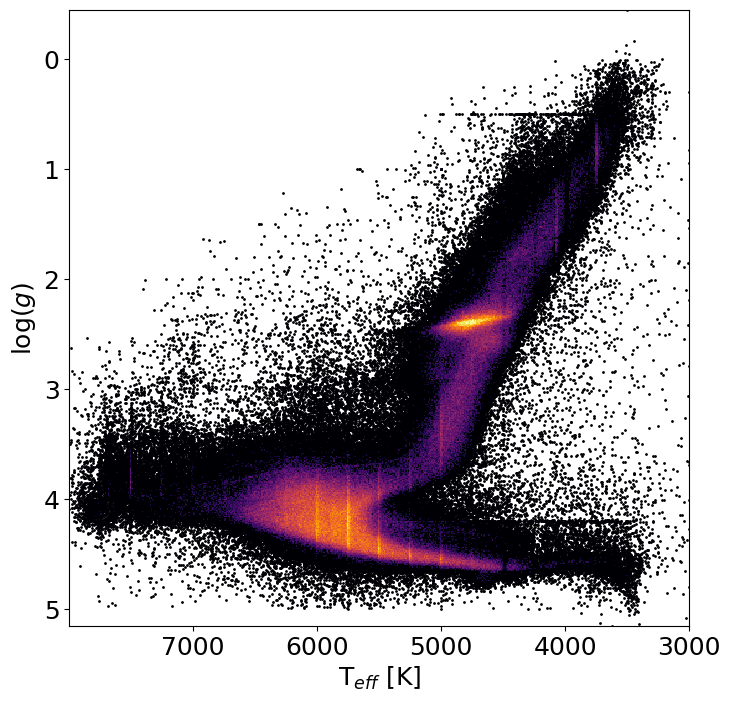

In [70]:
h = plt.hist2d(clean2["teff"], clean2["logg"], bins=500, cmin=5, norm=mplt.colors.PowerNorm(0.5), zorder=4,cmap=plt.cm.inferno)
plt.scatter(clean2["teff"],clean2["logg"],s=1,color=mplt.cm.get_cmap("inferno")(0),zorder=0)
#cb = plt.colorbar(h[3], pad=0.02)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.ylabel("$\log(g)$")
plt.xlabel("T$_{eff}$ [K]")
#plt.ylim(5,3)
plt.show()

In [88]:
giants = clean2.loc[(clean2["teff"] <= 6000) & (clean2["logg"] <= 3)]

In [96]:
clean2.shape

(574088, 32)

In [90]:
giants.shape[0] 

153690

In [93]:
giants.to_csv("giants.csv",header=True,index=False)

In [97]:
clean2.to_csv("complete.csv",header=True,index=False)